In [38]:
import glob
import os
import torch
import torchaudio
import matplotlib.pyplot as plt

In [39]:
FOLDER = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/streamlit_audio"

In [40]:
files = glob.glob(f"{FOLDER}/**/**/*.wav", recursive=True)

In [41]:
for i in files:
    print(i.replace(".wav", ".png"))

/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/streamlit_audio/daps-pboard/ambience/x.png
/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/streamlit_audio/daps-pboard/ambience/y_hat.png
/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/streamlit_audio/daps-pboard/ambience/y.png
/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/streamlit_audio/daps-pboard/delay/x.png
/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/streamlit_audio/daps-pboard/delay/y_hat.png
/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/streamlit_audio/daps-pboard/delay/y_ref.png
/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/streamlit_audio/daps-pboard/delay/y.png
/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/streamlit_audio/daps-pboard/overdrive/x.png
/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/streamlit_audio/daps-pboard/overdrive/y_hat.png
/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/streamlit_audio/daps-pboard/overdrive/y_ref.png
/home/kie

In [78]:
def audio_to_spectrogram(signal: torch.Tensor,
                         n_fft: int = 4096,
                         hop_length: int = 2048,
                         window_size: int = 4096):
    bs, _, _ = signal.size()

#     if normalise_audio:
#         signal = peak_normalise(signal)

    window = torch.hann_window(window_size).to(signal.device)

    X = torch.stft(
        signal.view(bs, -1),
        n_fft=n_fft,
        hop_length=hop_length,
        win_length=window_size,
        window=window,
        return_complex=True,
    )

    # Absolute value part
    X_db = torch.pow(X.abs() + 1e-8, 0.3)

    # Normalise (0,1)
    X_db_norm = (X_db - X_db.mean()) / X_db.std()

    X_db_norm = X_db_norm

    return X_db_norm.squeeze()

In [79]:
def get_spectrogram(f_name):
    audio, _ = torchaudio.load(f_name)
    spec = audio_to_spectrogram(audio.unsqueeze(0))
    spec = torch.flip(spec, dims = [0,1])
    return spec.numpy().squeeze()

In [80]:
example = files[0]

In [81]:
spec = get_spectrogram(example)

In [82]:
spec

array([[-1.157182  , -1.1389663 , -1.1890924 , ..., -1.1161067 ,
        -1.1568111 , -1.0657883 ],
       [-1.1336638 , -1.1082139 , -1.1718296 , ..., -1.1084365 ,
        -1.1440859 , -1.1005535 ],
       [-1.1156013 , -1.09555   , -1.1090162 , ..., -1.1142746 ,
        -1.1641667 , -1.1663505 ],
       ...,
       [ 0.48588142,  1.4883541 ,  1.2909983 , ...,  1.4118594 ,
         1.266342  ,  0.3971063 ],
       [ 0.86168766,  0.71918684,  0.61900294, ...,  0.9405897 ,
         0.84179807, -0.2219597 ],
       [ 0.87604713, -0.5656408 ,  0.4158982 , ...,  0.82665306,
         0.6061288 ,  0.2115459 ]], dtype=float32)

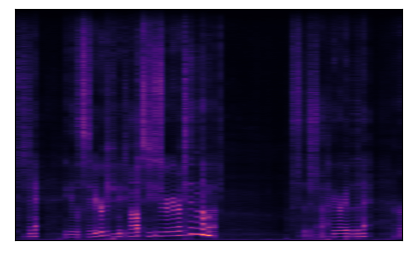

In [94]:
fig, ax = plt.subplots(1,1, figsize=(5,3))
ax.imshow(spec, aspect='auto', cmap='magma')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig()

In [99]:
for f_name in files:
    spec = get_spectrogram(f_name)
    fig, ax = plt.subplots(1,1, figsize=(5,3))
    ax.imshow(spec, aspect='auto', cmap='magma')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.axis('off')
    plt.savefig(f_name.replace(".wav", ".png"), bbox_inches='tight', transparent=True, pad_inches=0)
    plt.close()